# Capítulo 10

## _Séries Temporais_

In [307]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pytz
from pandas import Series, DataFrame
from datetime import datetime, timedelta
from dateutil.parser import parse
from pandas.tseries.offsets import Hour, Minute, MonthEnd, Day

## _Tipos de dados e ferramentas para data e hora_

In [308]:
now = datetime.now()
print(now)
print(now.year, now.month, now.day)

2023-09-07 23:18:53.046211
2023 9 7


In [309]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(days=926, seconds=56700)

In [310]:
print(delta.days, delta.seconds)

926 56700


In [311]:
start = datetime(2011, 1, 7)
start + timedelta(12) # 12 dias

datetime.datetime(2011, 1, 19, 0, 0)

In [312]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

- Conversão entre string e datetime

In [313]:
stamp = datetime(2011, 1, 3)
str(stamp)

'2011-01-03 00:00:00'

In [314]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [315]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [316]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [317]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [318]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [319]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [320]:
datestrs = ["2011-07-06 12:00:00", "2011-08-06 00:00:00"]
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [321]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [322]:
pd.isnull(idx)

array([False, False,  True])

## _Básico de séries temporais_

In [323]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02    0.693834
2011-01-05    0.827001
2011-01-07    0.462733
2011-01-08    1.777318
2011-01-10    1.037257
2011-01-12    0.810276
dtype: float64

In [324]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [325]:
ts + ts[2::]

2011-01-02         NaN
2011-01-05         NaN
2011-01-07    0.925466
2011-01-08    3.554635
2011-01-10    2.074515
2011-01-12    1.620551
dtype: float64

In [326]:
staps = ts.index[0]
stamp

datetime.datetime(2011, 1, 3, 0, 0)

- Indexação, seleção e geração de subconjuntos

In [327]:
stamps = ts.index[2]
ts[stamps]

0.4627328103471663

In [328]:
ts['1/10/2011']

1.0372574226584168

In [329]:
ts['20110112'] #2011 10 12

0.8102755697062246

In [330]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01    1.200658
2000-01-02   -0.560581
2000-01-03   -0.228533
2000-01-04    0.147444
2000-01-05   -1.047489
                ...   
2002-09-22    0.098221
2002-09-23    2.121945
2002-09-24    0.426454
2002-09-25   -0.735584
2002-09-26   -1.710978
Freq: D, Length: 1000, dtype: float64

In [331]:
longer_ts['2001']

2001-01-01   -0.130359
2001-01-02   -0.571252
2001-01-03    0.141271
2001-01-04   -0.799945
2001-01-05   -0.552513
                ...   
2001-12-27   -1.546728
2001-12-28    1.586053
2001-12-29   -0.600006
2001-12-30   -0.290593
2001-12-31    0.509533
Freq: D, Length: 365, dtype: float64

In [332]:
longer_ts['2001-05']

2001-05-01    0.412038
2001-05-02   -0.509249
2001-05-03    1.514033
2001-05-04   -0.607910
2001-05-05    0.146537
2001-05-06   -1.178703
2001-05-07   -0.205381
2001-05-08   -0.187520
2001-05-09    1.591760
2001-05-10    0.579681
2001-05-11    0.076152
2001-05-12   -0.689327
2001-05-13   -0.504483
2001-05-14    0.893462
2001-05-15    0.173333
2001-05-16    1.947287
2001-05-17    0.754905
2001-05-18   -0.082751
2001-05-19    0.009016
2001-05-20    0.983583
2001-05-21    1.438747
2001-05-22    0.605184
2001-05-23    0.218581
2001-05-24   -0.626541
2001-05-25    0.122880
2001-05-26    0.738670
2001-05-27    0.563943
2001-05-28    2.763134
2001-05-29   -0.492236
2001-05-30   -0.014182
2001-05-31   -1.251955
Freq: D, dtype: float64

In [333]:
ts[datetime(2011, 1, 7):]

2011-01-07    0.462733
2011-01-08    1.777318
2011-01-10    1.037257
2011-01-12    0.810276
dtype: float64

In [334]:
ts

2011-01-02    0.693834
2011-01-05    0.827001
2011-01-07    0.462733
2011-01-08    1.777318
2011-01-10    1.037257
2011-01-12    0.810276
dtype: float64

In [335]:
ts['1/6/2011':'1/11/2011']

2011-01-07    0.462733
2011-01-08    1.777318
2011-01-10    1.037257
dtype: float64

In [336]:
ts.truncate(after='1/9/2011')

2011-01-02    0.693834
2011-01-05    0.827001
2011-01-07    0.462733
2011-01-08    1.777318
dtype: float64

In [337]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
longer_df = pd.DataFrame(np.random.randn(100, 4), index=dates,
                        columns=['Colorado', 'Texas', 'New York', 'Ohio'])
longer_df

,Colorado,Texas,New York,Ohio
2000-01-05,0.611962,-0.888503,-1.058091,0.232021
2000-01-12,-0.513096,-0.608451,1.299100,0.184692
2000-01-19,0.009987,-0.636693,-1.339246,-0.767727
2000-01-26,-0.691279,0.700392,-0.952486,0.295792
2000-02-02,0.385012,0.259583,-0.101219,-0.109576
...,...,...,...,...
2001-10-31,2.310528,-0.192289,-1.569067,-0.326379
2001-11-07,1.140265,0.293278,0.011250,0.511219
2001-11-14,-1.856519,-1.339917,-1.260769,-0.984249
2001-11-21,-0.453546,-1.264456,0.338892,0.034336


In [338]:
longer_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-0.792855,-0.312487,0.037621,0.898659
2001-05-09,0.246070,-1.794275,0.547529,0.296086
2001-05-16,-0.470011,-0.274094,-0.407557,-0.515781
2001-05-23,1.646973,-0.295202,0.007591,0.571311
2001-05-30,0.940682,-1.485944,0.131148,-0.901721


- Séries temporais com índices duplicados

In [339]:
dates = pd.DatetimeIndex(["2000-01-01", "2000-01-02", "2000-01-02",
                          "2000-01-02", "2000-01-03"])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [340]:
dup_ts.index.is_unique

False

In [341]:
dup_ts['2000-01-03'] # não duplicado

4

In [342]:
dup_ts['2000-01-02'] #duplicado

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [343]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

In [344]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## _Intervalos de datas, frequências e deslocamentos_

In [345]:
ts
resempler = ts.resample('D')
resempler

- Gerando intervalos de datas

In [346]:
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [347]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [348]:
pd.date_range(start='2012-04-01', end='2012-06-01', periods=20)

DatetimeIndex([          '2012-04-01 00:00:00',
               '2012-04-04 05:03:09.473684210',
               '2012-04-07 10:06:18.947368421',
               '2012-04-10 15:09:28.421052631',
               '2012-04-13 20:12:37.894736842',
               '2012-04-17 01:15:47.368421052',
               '2012-04-20 06:18:56.842105263',
               '2012-04-23 11:22:06.315789473',
               '2012-04-26 16:25:15.789473684',
               '2012-04-29 21:28:25.263157895',
               '2012-05-03 02:31:34.736842105',
               '2012-05-06 07:34:44.210526316',
               '2012-05-09 12:37:53.684210526',
               '2012-05-12 17:41:03.157894737',
               '2012-05-15 22:44:12.631578947',
               '2012-05-19 03:47:22.105263158',
               '2012-05-22 08:50:31.578947368',
               '2012-05-25 13:53:41.052631579',
               '2012-05-28 18:56:50.526315790',
                         '2012-06-01 00:00:00'],
              dtype='datetime64[ns]', f

In [349]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

- Frequência e offset de datas

In [350]:
four_hour = Hour(4)
four_hour

<4 * Hours>

In [351]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [352]:
Hour(2) + Minute(30)

<150 * Minutes>

In [353]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

- Datas com a semana do mês

In [354]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')
list(rng)

[Timestamp('2012-01-20 00:00:00'),
 Timestamp('2012-02-17 00:00:00'),
 Timestamp('2012-03-16 00:00:00'),
 Timestamp('2012-04-20 00:00:00'),
 Timestamp('2012-05-18 00:00:00'),
 Timestamp('2012-06-15 00:00:00'),
 Timestamp('2012-07-20 00:00:00'),
 Timestamp('2012-08-17 00:00:00')]

- Deslocamento de datas (adiantando e atrasando)

In [355]:
ts = pd.Series(np.arange(4), 
               index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31    0
2000-02-29    1
2000-03-31    2
2000-04-30    3
Freq: M, dtype: int32

In [356]:
ts.shift(2)

2000-01-31    NaN
2000-02-29    NaN
2000-03-31    0.0
2000-04-30    1.0
Freq: M, dtype: float64

In [357]:
ts.shift(-2)

2000-01-31    2.0
2000-02-29    3.0
2000-03-31    NaN
2000-04-30    NaN
Freq: M, dtype: float64

In [358]:
# frequêncoa conhecida
ts.shift(2, freq='M')

2000-03-31    0
2000-04-30    1
2000-05-31    2
2000-06-30    3
Freq: M, dtype: int32

In [359]:
ts.shift(3, freq='D')

2000-02-03    0
2000-03-03    1
2000-04-03    2
2000-05-03    3
dtype: int32

In [360]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00    0
2000-02-29 01:30:00    1
2000-03-31 01:30:00    2
2000-04-30 01:30:00    3
dtype: int32

- Deslocando datas com offsets

In [361]:
now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [362]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [363]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [364]:
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [365]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [366]:
ts = pd.Series(np.arange(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts

2000-01-15     0
2000-01-19     1
2000-01-23     2
2000-01-27     3
2000-01-31     4
2000-02-04     5
2000-02-08     6
2000-02-12     7
2000-02-16     8
2000-02-20     9
2000-02-24    10
2000-02-28    11
2000-03-03    12
2000-03-07    13
2000-03-11    14
2000-03-15    15
2000-03-19    16
2000-03-23    17
2000-03-27    18
2000-03-31    19
Freq: 4D, dtype: int32

In [367]:
ts.groupby(offset.rollforward).mean()

2000-01-31     2.0
2000-02-29     8.0
2000-03-31    15.5
dtype: float64

In [368]:
ts.resample('M').mean()

2000-01-31     2.0
2000-02-29     8.0
2000-03-31    15.5
Freq: M, dtype: float64

## _Tratamento de fuso horário_

In [369]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [370]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

- Localização e conversão dos fusos horários

In [371]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00   -1.283978
2012-03-10 09:30:00    0.085708
2012-03-11 09:30:00    1.072917
2012-03-12 09:30:00    0.297598
2012-03-13 09:30:00   -1.115236
2012-03-14 09:30:00   -0.886197
Freq: D, dtype: float64

In [372]:
print(ts.index.tz)

None


In [373]:
# Definição de fuso horário
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [374]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00   -1.283978
2012-03-10 09:30:00+00:00    0.085708
2012-03-11 09:30:00+00:00    1.072917
2012-03-12 09:30:00+00:00    0.297598
2012-03-13 09:30:00+00:00   -1.115236
2012-03-14 09:30:00+00:00   -0.886197
Freq: D, dtype: float64

In [375]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [376]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00   -1.283978
2012-03-10 04:30:00-05:00    0.085708
2012-03-11 05:30:00-04:00    1.072917
2012-03-12 05:30:00-04:00    0.297598
2012-03-13 05:30:00-04:00   -1.115236
2012-03-14 05:30:00-04:00   -0.886197
Freq: D, dtype: float64

In [377]:
ts_eastern = ts.tz_localize('America/New_York')
ts_eastern.tz_convert('UTC')
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -1.283978
2012-03-10 15:30:00+01:00    0.085708
2012-03-11 14:30:00+01:00    1.072917
2012-03-12 14:30:00+01:00    0.297598
2012-03-13 14:30:00+01:00   -1.115236
2012-03-14 14:30:00+01:00   -0.886197
dtype: float64

In [378]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

- Operações com objetos Timestamp que consideram fusos horários

In [379]:
stamp = pd.Timestamp('2011-03-12 4:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [380]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [381]:
stamp_utc.value

1299902400000000000

In [382]:
stamp = pd.Timestamp('2012-03-12 1:30', tz='US/Eastern')
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [383]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

- Operações entre fusos horários diferentes

In [384]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts

2012-03-07 09:30:00    0
2012-03-08 09:30:00    1
2012-03-09 09:30:00    2
2012-03-12 09:30:00    3
2012-03-13 09:30:00    4
2012-03-14 09:30:00    5
2012-03-15 09:30:00    6
2012-03-16 09:30:00    7
2012-03-19 09:30:00    8
2012-03-20 09:30:00    9
Freq: B, dtype: int32

In [385]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

## _Períodos e aritmética com períodso_

In [386]:
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [387]:
p + 5

Period('2012', 'A-DEC')

In [388]:
pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

In [389]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

In [390]:
pd.Series(np.random.randn(6), index=rng)

2000-01    1.973636
2000-02    1.080936
2000-03   -0.770027
2000-04    0.419794
2000-05    1.223576
2000-06   -0.287291
Freq: M, dtype: float64

- Conversão de frequência de períodos

In [391]:
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [392]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [393]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [394]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2006    1.529350
2007    0.121101
2008   -0.863331
2009    1.955381
Freq: A-DEC, dtype: float64

In [395]:
ts.asfreq('M', how='start')

2006-01    1.529350
2007-01    0.121101
2008-01   -0.863331
2009-01    1.955381
Freq: M, dtype: float64

In [396]:
ts.asfreq('B', how='end')

2006-12-29    1.529350
2007-12-31    0.121101
2008-12-31   -0.863331
2009-12-31    1.955381
Freq: B, dtype: float64

- Frequências de períodos trimestrais

In [397]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [398]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [399]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [400]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

In [401]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [402]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [403]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

- Convertendo timestamps para períodos e vice-versa

In [404]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)
ts

2000-01-31   -1.049406
2000-02-29    0.073392
2000-03-31   -0.587379
Freq: M, dtype: float64

In [405]:
pts = ts.to_period()
pts

2000-01   -1.049406
2000-02    0.073392
2000-03   -0.587379
Freq: M, dtype: float64

In [406]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2

2000-01-29   -0.874218
2000-01-30    0.288536
2000-01-31    1.017698
2000-02-01    0.315531
2000-02-02   -0.232276
2000-02-03   -0.702928
Freq: D, dtype: float64

In [407]:
ts2.to_period('M')

2000-01   -0.874218
2000-01    0.288536
2000-01    1.017698
2000-02    0.315531
2000-02   -0.232276
2000-02   -0.702928
Freq: M, dtype: float64

In [408]:
pts = ts2.to_period()
pts

2000-01-29   -0.874218
2000-01-30    0.288536
2000-01-31    1.017698
2000-02-01    0.315531
2000-02-02   -0.232276
2000-02-03   -0.702928
Freq: D, dtype: float64

In [409]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999   -0.874218
2000-01-30 23:59:59.999999999    0.288536
2000-01-31 23:59:59.999999999    1.017698
2000-02-01 23:59:59.999999999    0.315531
2000-02-02 23:59:59.999999999   -0.232276
2000-02-03 23:59:59.999999999   -0.702928
Freq: D, dtype: float64

- Criando um PeriodIndex a parti de arrays

In [410]:
data = pd.read_csv('exemplos/macrodata.csv')
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [411]:
data.year

0      1959
1      1959
2      1959
3      1959
4      1960
       ... 
198    2008
199    2008
200    2009
201    2009
202    2009
Name: year, Length: 203, dtype: int64

In [412]:
data.quarter

0      1
1      2
2      3
3      4
4      1
      ..
198    3
199    4
200    1
201    2
202    3
Name: quarter, Length: 203, dtype: int64

In [413]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                       freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

In [414]:
data.index = index
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## _Reamostragem e conversão de frequências_

In [415]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts

2000-01-01     0
2000-01-02     1
2000-01-03     2
2000-01-04     3
2000-01-05     4
              ..
2000-04-05    95
2000-04-06    96
2000-04-07    97
2000-04-08    98
2000-04-09    99
Freq: D, Length: 100, dtype: int32

In [416]:
ts.resample('M').mean()

2000-01-31    15.0
2000-02-29    45.0
2000-03-31    75.0
2000-04-30    95.0
Freq: M, dtype: float64

In [417]:
ts.resample('M', kind='period').mean()

2000-01    15.0
2000-02    45.0
2000-03    75.0
2000-04    95.0
Freq: M, dtype: float64

- Downsampling

In [418]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [419]:
ts.resample('5min', closed='left').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [420]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [421]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [422]:
from pandas.tseries.frequencies import to_offset

result = ts.resample("5min", closed="right", label="right").sum()
result.index = result.index + to_offset("-1s")
result

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

- Reamostragem OHLC (Open-High-Low-Close)

In [423]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


- Upsampling e interpolação

In [424]:
frame = pd.DataFrame(np.random.randn(2, 4), 
                     index=pd.date_range('1/1/2000', periods=2
                    ,freq='W-WED'), columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.946324,2.199523,-0.240838,1.566945
2000-01-12,-0.889818,-0.770232,-0.899602,-0.419748


In [425]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.946324,2.199523,-0.240838,1.566945
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.889818,-0.770232,-0.899602,-0.419748


In [426]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.946324,2.199523,-0.240838,1.566945
2000-01-06,-0.946324,2.199523,-0.240838,1.566945
2000-01-07,-0.946324,2.199523,-0.240838,1.566945
2000-01-08,-0.946324,2.199523,-0.240838,1.566945
2000-01-09,-0.946324,2.199523,-0.240838,1.566945
2000-01-10,-0.946324,2.199523,-0.240838,1.566945
2000-01-11,-0.946324,2.199523,-0.240838,1.566945
2000-01-12,-0.889818,-0.770232,-0.899602,-0.419748


In [427]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.946324,2.199523,-0.240838,1.566945
2000-01-06,-0.946324,2.199523,-0.240838,1.566945
2000-01-07,-0.946324,2.199523,-0.240838,1.566945
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.889818,-0.770232,-0.899602,-0.419748


In [428]:
frame.resample('W-WED').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.946324,2.199523,-0.240838,1.566945
2000-01-12,-0.889818,-0.770232,-0.899602,-0.419748


- Reamostragem com períodos

In [429]:
frame = pd.DataFrame(np.random.standard_normal((24, 4)),
                     index=pd.period_range('1-2000', '12-2001', freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame.head()

,Colorado,Texas,New York,Ohio
2000-01,0.541920,-1.098460,0.316340,-0.539551
2000-02,-0.318365,-0.927413,-0.434708,-0.105636
2000-03,0.080035,-1.122849,0.238463,-1.082469
2000-04,0.767666,1.110225,2.086982,0.618332
2000-05,-1.822659,-0.023505,-1.025840,-2.626658


In [430]:
anual_frame = frame.resample('A-DEC').mean()
anual_frame

,Colorado,Texas,New York,Ohio
2000,0.220236,-0.020652,0.112020,-0.613746
2001,-0.351661,-0.363133,0.519522,0.113187


In [431]:
#trimestral com o ano terminando em dezembro
anual_frame.resample('Q-DEC',).ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.220236,-0.020652,0.112020,-0.613746
2000Q2,0.220236,-0.020652,0.112020,-0.613746
2000Q3,0.220236,-0.020652,0.112020,-0.613746
2000Q4,0.220236,-0.020652,0.112020,-0.613746
2001Q1,-0.351661,-0.363133,0.519522,0.113187
2001Q2,-0.351661,-0.363133,0.519522,0.113187
2001Q3,-0.351661,-0.363133,0.519522,0.113187
2001Q4,-0.351661,-0.363133,0.519522,0.113187


In [432]:
anual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.220236,-0.020652,0.112020,-0.613746
2001Q1,0.220236,-0.020652,0.112020,-0.613746
2001Q2,0.220236,-0.020652,0.112020,-0.613746
2001Q3,0.220236,-0.020652,0.112020,-0.613746
2001Q4,-0.351661,-0.363133,0.519522,0.113187


In [433]:
anual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.220236,-0.020652,0.112020,-0.613746
2001Q1,0.220236,-0.020652,0.112020,-0.613746
2001Q2,0.220236,-0.020652,0.112020,-0.613746
2001Q3,0.220236,-0.020652,0.112020,-0.613746
2001Q4,-0.351661,-0.363133,0.519522,0.113187
2002Q1,-0.351661,-0.363133,0.519522,0.113187
2002Q2,-0.351661,-0.363133,0.519522,0.113187
2002Q3,-0.351661,-0.363133,0.519522,0.113187


## _Funções de janela móvel_

In [447]:
close_px_all = pd.read_csv('exemplos/stock_px.csv',
                           parse_dates=True, index_col=0)
close_px_all.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [435]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


<AxesSubplot: >

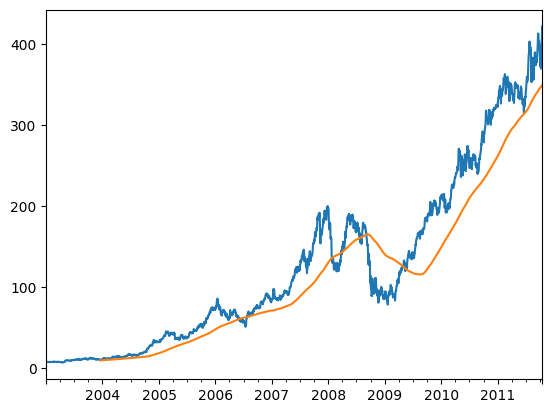

In [436]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

In [437]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=15).std()
appl_std250[:20]

2003-01-02         NaN
2003-01-03         NaN
2003-01-06         NaN
2003-01-07         NaN
2003-01-08         NaN
2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15         NaN
2003-01-16         NaN
2003-01-17         NaN
2003-01-20         NaN
2003-01-21         NaN
2003-01-22    0.169008
2003-01-23    0.168760
2003-01-24    0.184135
2003-01-27    0.182546
2003-01-28    0.178117
2003-01-29    0.181870
Freq: B, Name: AAPL, dtype: float64

<AxesSubplot: >

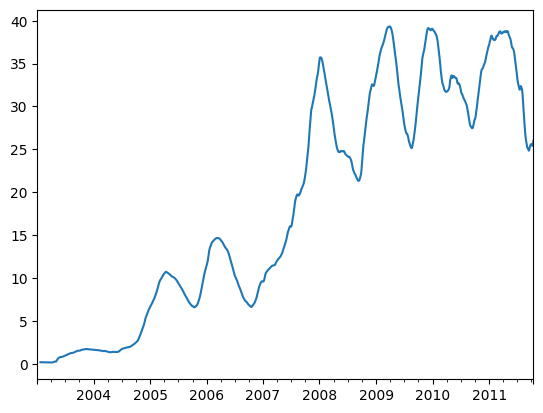

In [438]:
appl_std250.plot()

In [439]:
expanding_mean = appl_std250.expanding().mean()
expanding_mean

2003-01-02          NaN
2003-01-03          NaN
2003-01-06          NaN
2003-01-07          NaN
2003-01-08          NaN
                ...    
2011-10-10    18.561685
2011-10-11    18.564745
2011-10-12    18.567847
2011-10-13    18.571005
2011-10-14    18.574263
Freq: B, Name: AAPL, Length: 2292, dtype: float64

<AxesSubplot: >

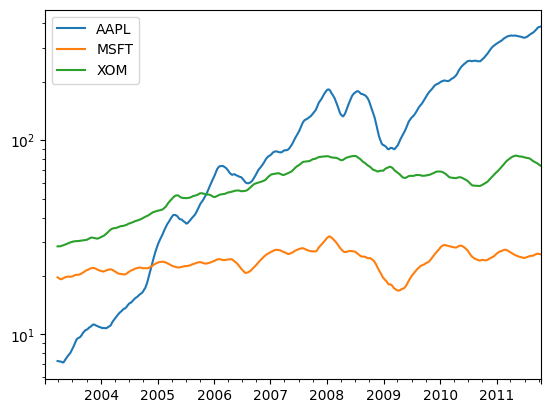

In [440]:
close_px.rolling(60).mean().plot(logy=True)

In [441]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


- Funções exponencialmente ponderadas

In [442]:
aapl_px = close_px.AAPL['2006':'2007']
aapl_px

2006-01-02     71.89
2006-01-03     74.75
2006-01-04     74.97
2006-01-05     74.38
2006-01-06     76.30
               ...  
2007-12-25    198.80
2007-12-26    198.95
2007-12-27    198.57
2007-12-28    199.83
2007-12-31    198.08
Freq: B, Name: AAPL, Length: 521, dtype: float64

In [443]:
ma60 = aapl_px.rolling(30, min_periods=1).mean()
ma60

2006-01-02     71.890000
2006-01-03     73.320000
2006-01-04     73.870000
2006-01-05     73.997500
2006-01-06     74.458000
                 ...    
2007-12-25    181.520333
2007-12-26    182.615000
2007-12-27    183.757333
2007-12-28    184.872000
2007-12-31    186.009667
Freq: B, Name: AAPL, Length: 521, dtype: float64

In [444]:
ewm60 = aapl_px.ewm(span=30).mean()
ewm60

2006-01-02     71.890000
2006-01-03     73.367667
2006-01-04     73.937767
2006-01-05     74.059619
2006-01-06     74.569360
                 ...    
2007-12-25    184.441771
2007-12-26    185.377786
2007-12-27    186.228897
2007-12-28    187.106387
2007-12-31    187.814362
Freq: B, Name: AAPL, Length: 521, dtype: float64

<AxesSubplot: >

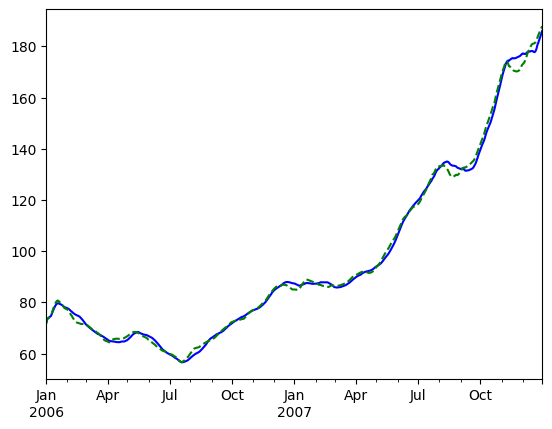

In [445]:
ma60.plot(style='b-', label='Simple MA')
ewm60.plot(style='g--', label='EM MA')

- Funções de janela móvel binárias

In [453]:
spx_px = close_px_all['SPX']
spx_px

2003-01-02     909.03
2003-01-03     908.59
2003-01-06     929.01
2003-01-07     922.93
2003-01-08     909.93
               ...   
2011-10-10    1194.89
2011-10-11    1195.54
2011-10-12    1207.25
2011-10-13    1203.66
2011-10-14    1224.58
Name: SPX, Length: 2214, dtype: float64

In [454]:
spx_rets = spx_px.pct_change()
spx_rets

2003-01-02         NaN
2003-01-03   -0.000484
2003-01-06    0.022474
2003-01-07   -0.006545
2003-01-08   -0.014086
                ...   
2011-10-10    0.034125
2011-10-11    0.000544
2011-10-12    0.009795
2011-10-13   -0.002974
2011-10-14    0.017380
Name: SPX, Length: 2214, dtype: float64

In [460]:
returns = close_px.pct_change()
returns

,AAPL,MSFT,XOM
2003-01-02,NaN,NaN,NaN
2003-01-03,0.006757,0.001421,0.000684
2003-01-06,0.000000,0.017975,0.024624
2003-01-07,-0.002685,0.019052,-0.033712
2003-01-08,-0.020188,-0.028272,-0.004145
...,...,...,...
2011-10-10,0.051406,0.026286,0.036977
2011-10-11,0.029526,0.002227,-0.000131
2011-10-12,0.004747,-0.001481,0.011669
2011-10-13,0.015515,0.008160,-0.010238


<AxesSubplot: >

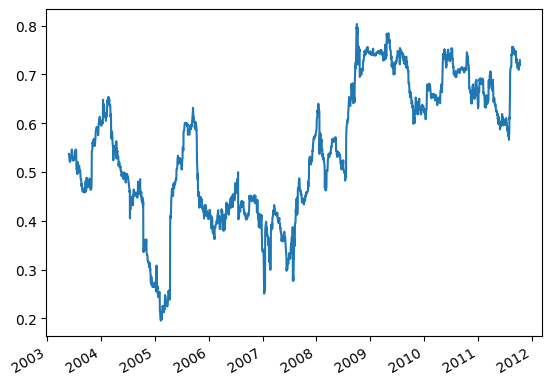

In [458]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

<AxesSubplot: >

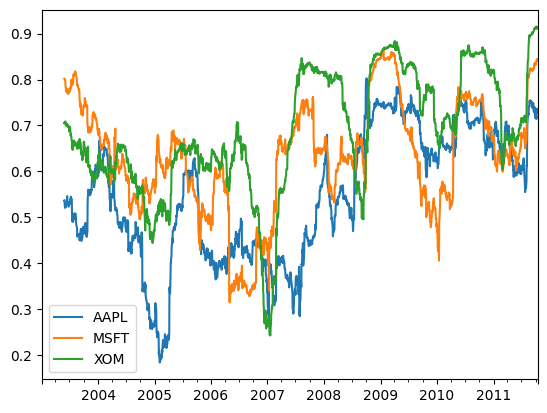

In [461]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

- Funções de janela móvel definidas pelo usuário

<AxesSubplot: >

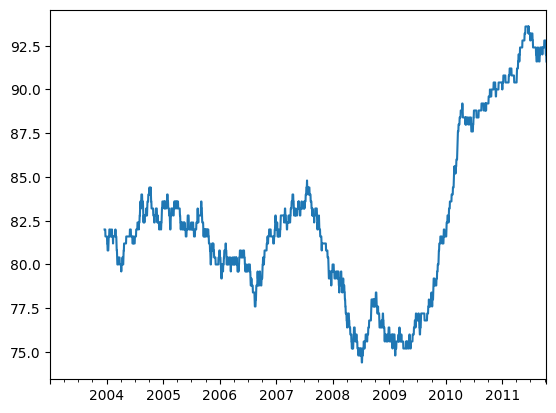

In [463]:
from scipy.stats import percentileofscore

score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()